Elige una variable dependiente y una independiente y realiza lo siguiente (en Python, puedes usar librerías de statsmodels):

- Diagrama de dispersión (Interpreta)
- Coeficiente de correlación (Interpreta)
- Coeficiente de determinación (Interpreta)
- Modelo de regresión lineal (Interpreta los coeficientes)
- Error cuadrático medio (no se requiere interpretación). *
- Tabla Anova. Interpreta lo siguiente:
- Prueba de hipótesis de validez del modelo (estadístico F).
- Pruebas de hipótesis de los coeficientes (estadístico t).
- Intervalos de confianza de los coeficientes.
- QQ-plot de residuos (interpreta).
Exporta tu notebook de Python como PDF y súbelo, las interpretaciones (y la tabla ANOVA) deben estar escritas ahí mismo como celdas tipo Markdown. Gracias!

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
df = pd.read_csv("Hours_Score.csv")  
df.head()

,hours,score
0,4.1,43.0
1,2.7,53.0
2,0.6,47.0
3,8.6,83.0
4,8.1,60.0


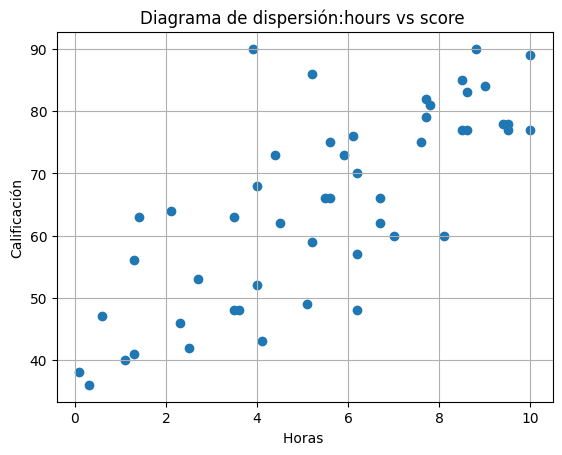

In [4]:
plt.scatter(df["hours"], df["score"])
plt.xlabel("Horas ")
plt.ylabel("Calificación")
plt.title("Diagrama de dispersión:hours vs score ")
plt.grid(True)
plt.show()

## Interpretacion:
El diagrama de dispersión muestra una relación positiva entre las horas y el score.Se observa que conforme aumenta las horas de estudio, también tienden a incrementarse las calificaciones, pero podemos ver que no es una relacion perfectamente lineal, ya que existen algunas variaciones entre los puntos.

In [7]:
X = df["hours"].values
Y = df["score"].values

In [8]:
import numpy as np

# Datos como arreglos
X = np.array(X)
Y = np.array(Y)

# Tamaño
n = len(X)

# Medias
X_m = np.mean(X)
Y_m = np.mean(Y)

# Coeficiente de correlación de Pearson
r = np.corrcoef(X, Y)[0, 1]

# Coeficientes de la recta
beta_1 = np.sum((X - X_m)*(Y - Y_m)) / np.sum((X - X_m)**2)
beta_0 = Y_m - beta_1 * X_m

# R-cuadrada
R2 = r**2

# Mostrar resultados
print(f"Media de X: {X_m:.2f}")
print(f"Media de Y: {Y_m:.2f}")
print(f"Coeficiente de correlación (r): {r:.4f}")
print(f"Coeficiente de determinación (R²): {R2:.4f}")
print(f"Recta de regresión: ŷ = {beta_0:.2f} + {beta_1:.2f}·X")

Media de X: 5.47
Media de Y: 65.16
Coeficiente de correlación (r): 0.7606
Coeficiente de determinación (R²): 0.5785
Recta de regresión: ŷ = 42.54 + 4.13·X


# Intepretación:
- Coeficiente de correlación: El coeficiente de correlación obtenido es 0.7606, lo que indica una relación positiva fuerte entre las horas de estudio y las calificaciones. Esto significa que, en general, a mayor horas estudiadas, se espera que aumenten tambien las calificaciones.

- Coeficiente de determinación: El coeficiente de determinación es 0.5785. Esto implica que aproximadamente el 57 % de la variabilidad en las calificaciones puede ser explicada por las horas de estudio. El restante 43 % se debe aotros factores que podrian ser tales como, el iq de cada individuo, la manera en que estudian, etc.

- Modelo de regresion lineal: El modelo de regresión estimado es:\
$y$ = 42.54 + 4.13X. El intercepto 42.54 representa el promedio de calificaciones esperadas si la horas estudiadas fuera de 0.. La pendiente 4.13 indica que por cada horas estudiadas adicionales,las calificaciones aumentan en promedio 4.13 puntos. 

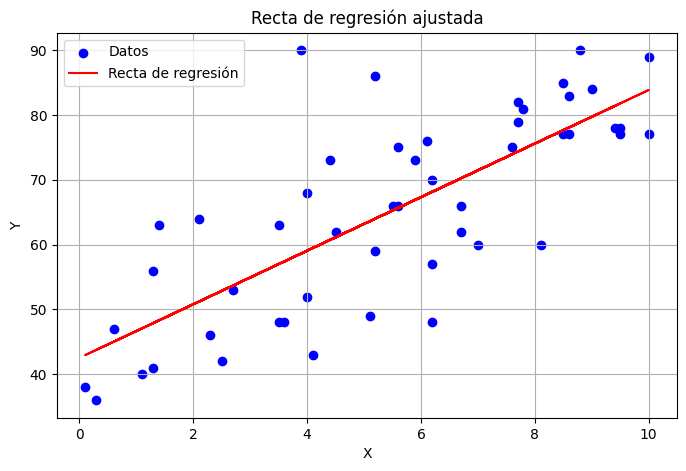

In [9]:
import matplotlib.pyplot as plt

# Valores predichos
Y_pred = beta_0 + beta_1 * X

# Graficar
plt.figure(figsize=(8, 5))
plt.scatter(X, Y, label='Datos', color='blue')
plt.plot(X, Y_pred, color='red', label='Recta de regresión')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Recta de regresión ajustada')
plt.legend()
plt.grid(True)
plt.show()


## Interpretacion:
El diagrama de dispersión muestra una relación positiva entre las horas y el score.Se observa que la mayoria de los datos se comportan de manera linean,que conforme aumenta las horas de estudio, también tienden a incrementarse las calificaciones, pero podemos ver que no es una relacion perfectamente lineal, ya que existen algunas variaciones entre los puntos.

In [10]:
# Error cuadrático medio
mse = np.mean((Y - Y_pred)**2)

print(f"Error cuadrático medio (MSE): {mse:.3f}")

Error cuadrático medio (MSE): 98.249


In [11]:
import statsmodels.api as sm

# Agregar columna de unos al array X
X_with_const = sm.add_constant(X)

# Ajustar modelo OLS
modelo = sm.OLS(Y, X_with_const).fit()

# Resumen
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     65.88
Date:                Tue, 02 Sep 2025   Prob (F-statistic):           1.47e-10
Time:                        16:22:27   Log-Likelihood:                -185.63
No. Observations:                  50   AIC:                             375.3
Df Residuals:                      48   BIC:                             379.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.5385      3.133     13.578      0.0

# Interpretacion: 
Intervalo de confianza: el intervalo de confianza que es de [3.109       5.156] nos dice que por cada hora estudiada, generan entre 3.109, y 5.156 unidades, adicionales de calificacion.


In [12]:
# Coeficientes del modelo
print(modelo.params)

# Acceder individualmente
beta_0 = modelo.params[0]   # intercepto
print(beta_0)
beta_1 = modelo.params[1]   # pendiente
print(beta_1)

[42.53851886  4.13253218]
42.53851886112377
4.132532177361386


In [13]:
# Predicciones con los mismos X usados en el ajuste
Y_pred_ = modelo.predict(X_with_const)
print(Y_pred_)

[59.48190079 53.69635574 45.01803817 78.07829559 76.0120295  83.86384063
 83.86384063 65.68069905 74.35901663 81.38432133 77.66504237 52.8698493
 61.13491366 47.91081069 81.79757455 67.74696514 52.04334287 70.22648445
 68.16021836 57.4156347  47.08430426 70.22648445 64.02768618 74.35901663
 64.02768618 77.66504237 65.26744584 65.68069905 78.90480202 59.06864757
 47.91081069 43.77827851 73.94576341 68.16021836 71.4662441  51.21683643
 48.32406391 42.95177208 57.00238148 66.92045871 58.65539435 60.72166044
 79.73130846 57.00238148 63.61443297 74.77226984 59.06864757 68.16021836
 78.07829559 81.79757455]


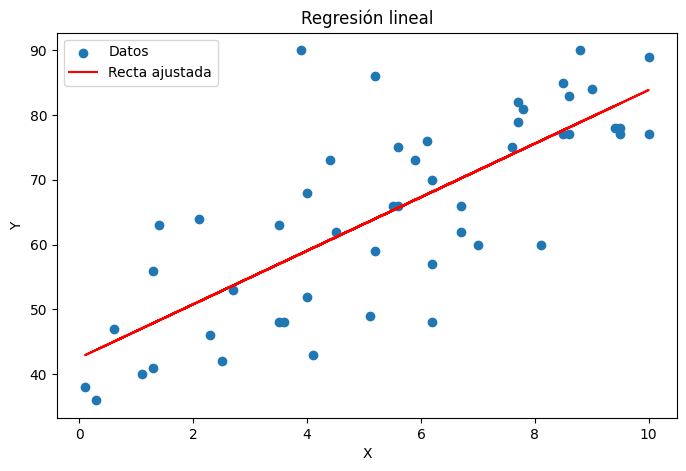

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(X, Y, label="Datos")
plt.plot(X, Y_pred_, color="red", label="Recta ajustada")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Regresión lineal")
plt.legend()
plt.show()

In [15]:
# SST: Suma total de cuadrados
SST = np.sum((Y - Y_m)**2)
print(SST)
# SSR: Suma de cuadrados de regresión (explicada)
SSR = np.sum((Y_pred - Y_m)**2)
print(SSR)
# SSE: Suma de cuadrados del error (residual)
SSE = np.sum((Y - Y_pred)**2)
print(SSE)

11654.720000000001
6742.259307622517
4912.460692377486


In [16]:
print(SSR+SSE)
print(np.isclose(SST, SSR + SSE))  # Debe ser True

11654.720000000003
True


In [18]:
#Grados de libertad
n=10
k=1


gl_reg   = k
gl_res   = n - k - 1
gl_total = n - 1

print(gl_reg,gl_res,gl_total)

1 8 9


In [19]:
#Variabilidad media
MSR = SSR / gl_reg
print(MSR)
MSE = SSE / gl_res
print(MSE)

6742.259307622517
614.0575865471858


In [21]:
#Estadístico F
F = MSR / MSE
print(F)

10.979848560350657


# Interpretacion:
Estadistico F: El valor obtenido de F = 10.9798 que compara la variabilidad explicada por el modelo con la variabilidad no explicada. Dado que e sun valor alto el modelo si explica una parte significativa de la variacion.

In [22]:
print(gl_reg)
print(gl_res)

1
8


In [24]:
from scipy.stats import f

p_valor = 1 - f.cdf(F, gl_reg, gl_res)
print(p_valor)

0.010641226329011877


In [29]:
from scipy.stats import f
p_valor = f.sf(F, gl_reg, gl_res)
print(p_valor)

0.010641226329011847


# Interpretacion:
Estadistico p: El p-valor = 0.0106 como es menor a 0.05, se concluye que el modelo es estadísticamente significativo.


In [26]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Datos en DataFrame
df = pd.DataFrame({"X": X, "Y": Y})

# Ajuste por fórmula
modelo = smf.ols("Y ~ X", data=df).fit()

# Tabla ANOVA (tipo I)
anova_tbl = sm.stats.anova_lm(modelo, typ=1)
print(anova_tbl)

            df       sum_sq      mean_sq          F        PR(>F)
X          1.0  6742.259308  6742.259308  65.879091  1.468648e-10
Residual  48.0  4912.460692   102.342931        NaN           NaN


### Tabla ANOVA

| Fuente     | df |    SS    |    MS    |    F   |
|------------|----|----------|----------|--------|
| Regresión  |  1 | 6742.26  | 6742.26  | 10.98  |
| Residual   |  8 | 4912.46  |  614.06  |        |
| Total      |  9 | 11654.72 |          |        |

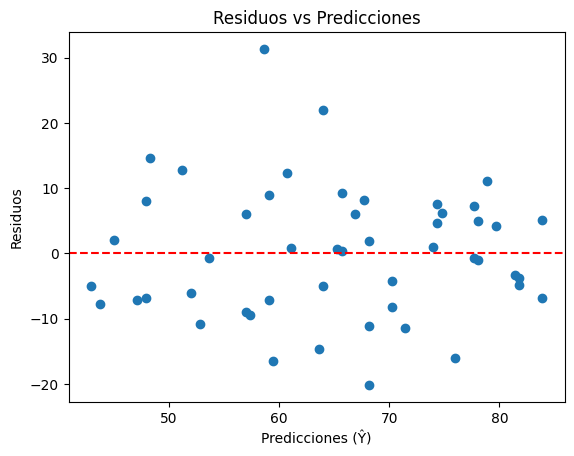

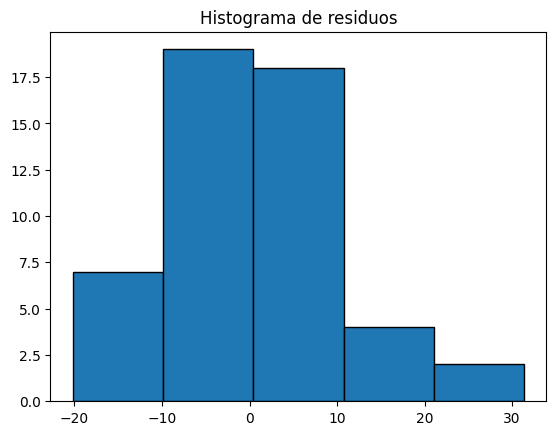

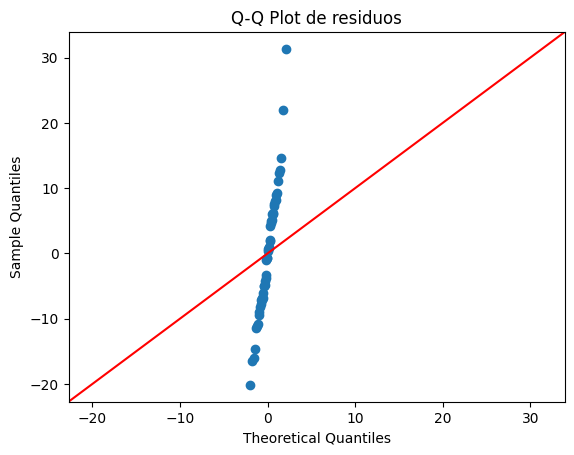

Estadístico Shapiro-Wilk: 0.9757310083178847
p-valor: 0.38898344476230884
No se rechaza normalidad (residuos ~ normales)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import shapiro


# Ajustar modelo
X_const = sm.add_constant(X)
modelo = sm.OLS(Y, X_const).fit()
Y_pred = modelo.predict(X_const)
residuos = Y - Y_pred

# Residuos vs Predicciones
plt.scatter(Y_pred, residuos)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicciones (Ŷ)")
plt.ylabel("Residuos")
plt.title("Residuos vs Predicciones")
plt.show()

# Histograma y Q-Q plot
plt.hist(residuos, bins=5, edgecolor="black")
plt.title("Histograma de residuos")
plt.show()

sm.qqplot(residuos, line='45')- 
plt.title("Q-Q Plot de residuos")
plt.show()

# Prueba de normalidad (Shapiro-Wilk)
stat, p_val = shapiro(residuos)
print("Estadístico Shapiro-Wilk:", stat)
print("p-valor:", p_val)
if p_val > 0.05:
    print("No se rechaza normalidad (residuos ~ normales)")
else:
    print("Se rechaza normalidad (residuos no normales)")


El gráfico muestra que la mayoria de los esiduos si pasan por la linea de roja, sin embargo hay valores en los extremos. Se podria decir que el supuesto de normalidad se cumple.